In [20]:
import numpy as np
import math
import os
import time
import re

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.ndimage import imread
from scipy import ndimage
from scipy.signal import fftconvolve
from skimage.measure import regionprops
from skimage import data, img_as_float

from PIL import Image
import cv2

from tqdm import tqdm



In [35]:
path = 'y:\\projects\\pn-reduction\\ershov\\speckle\\'

source = cv2.imread(path + '1_ref.tif', 0)
target = cv2.imread(path + '2_im.tif', 0)

imageW = source.shape[1]
imageH = source.shape[0]

In [36]:
m = 30

# Center of the patch
cx = 15
cy = 15

patch = target[cy-int(m/2):cy+int(m/2), cx-int(m/2): cx+int(m/2)]

w = patch.shape[1]
h = patch.shape[0]

(250, 400)


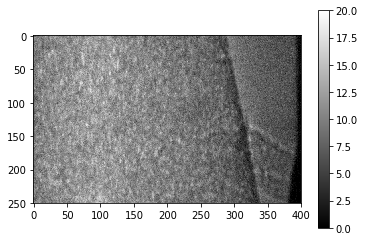

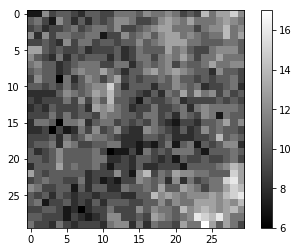

In [37]:
print(source.shape)

plt.imshow(source, cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(patch, cmap='gray')
plt.colorbar()
plt.show()

(221, 371)


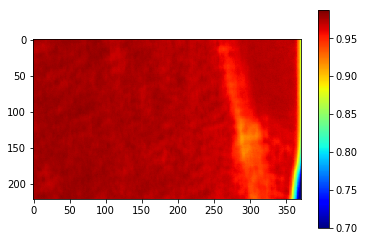

Top Left: (0, 0)
Displacement: 0.0 0.0


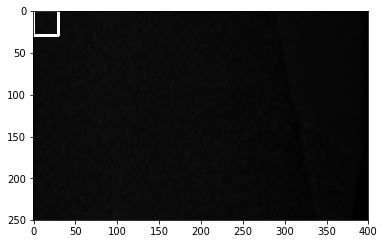

In [38]:
res = cv2.matchTemplate(source,patch,eval('cv2.TM_CCORR_NORMED'))
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

print(res.shape)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

plt.imshow(res, vmin=0.7, cmap='jet')
plt.colorbar()
plt.show()

print('Top Left:', max_loc)
print('Displacement:', max_loc[0] + m /2 - cx, max_loc[1] + m / 2 - cy)

img = source.copy()

cv2.rectangle(img,top_left, bottom_right, 255, 2)

plt.imshow(img, cmap = 'gray')

In [54]:
m = 30
h = 8 # max step (search neighbourhood)

x_disp =np.zeros_like(source).astype(np.float)
y_disp =np.zeros_like(source).astype(np.float)


src_pad = cv2.copyMakeBorder(source,m,m,m,m,cv2.BORDER_CONSTANT,value=0)

show = False

for i in tqdm(range(0, imageH - m)):
    for j in range(0, imageW - m):

#i = 0
#j = 0
    
        patch = target[i:i+m, j:j+m]

        src_patch = src_pad[i-h+m:i+h+2*m, j-h+m:j+h+2*m]

        res = cv2.matchTemplate(src_patch, patch, eval('cv2.TM_CCORR_NORMED'))
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        dx = max_loc[0] - h
        dy = max_loc[1] - h

        #print(max_loc[0], max_loc[1])
        #print(dx, dy)

        x_disp[i,j] = dx 
        y_disp[i,j] = dy


        if show:
            plt.imshow(patch, cmap='gray')
            plt.colorbar()
            plt.show()

            print(patch.shape)
            plt.imshow(src_patch, cmap='gray')
            plt.colorbar()
            plt.show()

            print(src_patch.shape)

            plt.imshow(res, cmap='jet')
            plt.colorbar()
            plt.show()

    

100%|████████████████████████████████████████| 220/220 [00:04<00:00, 45.47it/s]


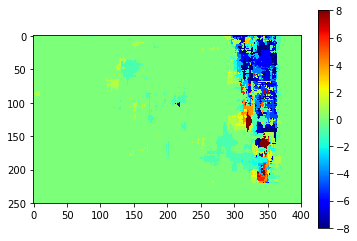

In [55]:
plt.imshow(x_disp, cmap='jet')
plt.colorbar()
plt.show()


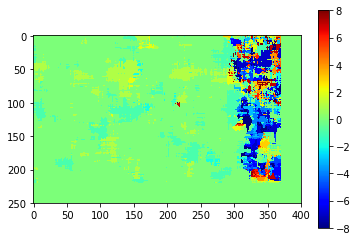

In [56]:
plt.imshow(y_disp, cmap='jet')
plt.colorbar()
plt.show()

In [57]:
im_res = Image.fromarray(x_disp)
im_res.save(path + 'disp_x.tif')

im_res = Image.fromarray(y_disp)
im_res.save(path + 'disp_y.tif')

